In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Install necessary libraries**

In [2]:
# Install TensorFlow
!pip install --upgrade tensorflow
!pip install keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Load Fashion MNIST dataset**

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


**Data Preprocessing**

In [5]:
# Resizing images to a consistent size
image_size = (28, 28)
train_images = np.array([np.resize(img, image_size) for img in train_images])
test_images = np.array([np.resize(img, image_size) for img in test_images])

# Normalizing pixel values
train_images, test_images = train_images / 255.0, test_images / 255.0

# Splitting data into training, validation, and testing sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, horizontal_flip=True)
datagen.fit(train_images.reshape((-1, 28, 28, 1)))


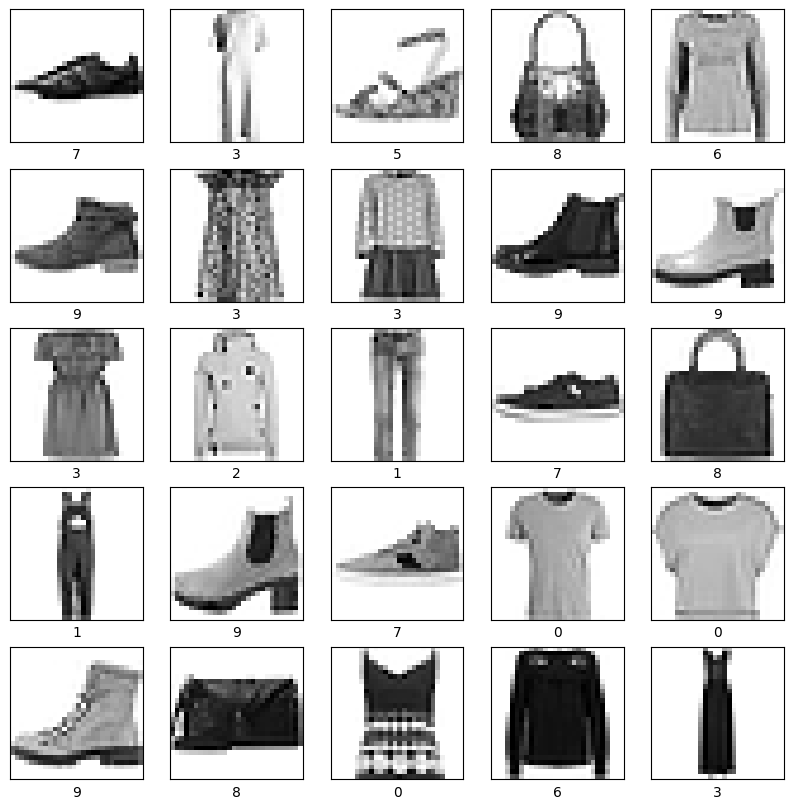

In [6]:
# Visualization
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

**CNN Model**

In [7]:
# CNN Model Design

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
# Model Implementation
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Model Training
history = model.fit(datagen.flow(train_images.reshape((-1, 28, 28, 1)), train_labels, batch_size=32),
                    epochs=10,
                    validation_data=(val_images.reshape((-1, 28, 28, 1)), val_labels))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

**Evaluation and Visualization**

313/313 - 3s - loss: 0.3168 - accuracy: 0.8879 - 3s/epoch - 8ms/step
Test Accuracy: 0.8878999948501587


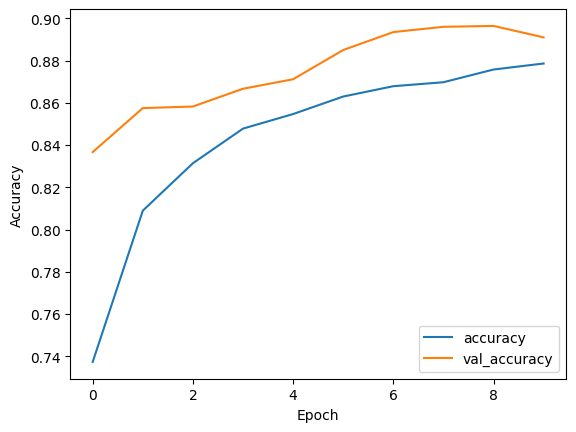

In [9]:
# Evaluation and Visualization
test_loss, test_acc = model.evaluate(test_images.reshape((-1, 28, 28, 1)), test_labels, verbose=2)
print(f"Test Accuracy: {test_acc}")

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

1/1 [==============================] - 0s 23ms/step


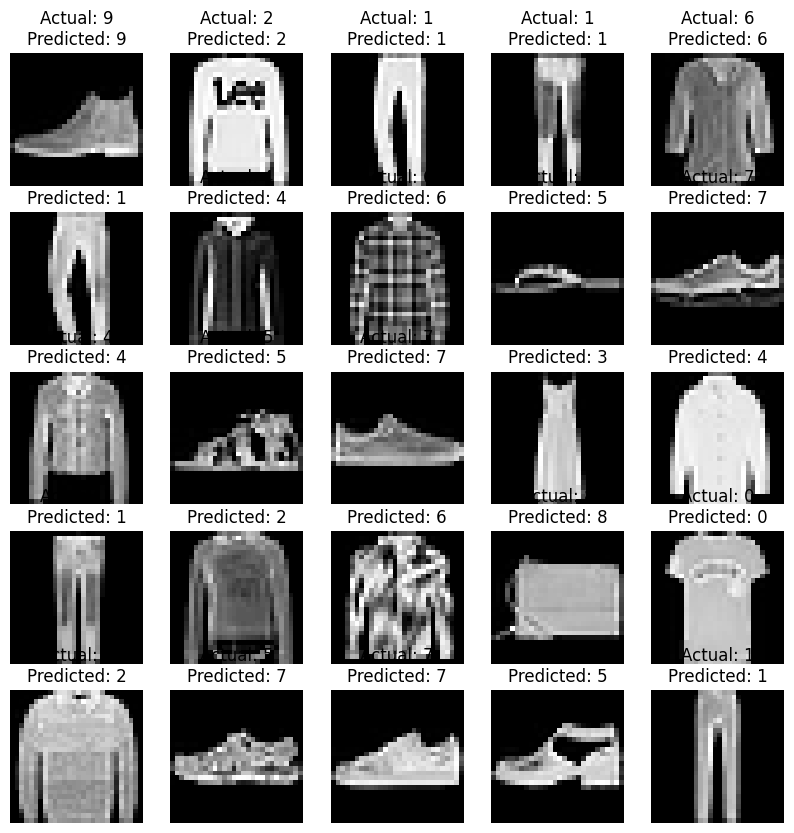

In [10]:
# Visualize model predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f'Actual: {test_labels[i]}\nPredicted: {np.argmax(model.predict(test_images[i:i+1]), axis=1)[0]}')
    plt.axis('off')

plt.show()